# Advanced Statistics For Physics - Second assignment

* **Student:** Faorlin Tommaso
* **ID:** 2021857
* **Course:** Physics of Data

In [57]:
library(tidyverse)

## Exercise 1

In [58]:
x   <- c(15.58, 15.9, 16, 16.1, 16.2)
p1 <- c(0.15, 0.21, 0.35, 0.15, 0.14)
p2 <- c(0.14, 0.05, 0.64, 0.08, 0.09)

In [59]:
#dataframe from vectors
table <- data.frame(x, p1, p2)
print(paste("Mean with first method:", sum(table$x*table$p1)))
print(paste("Mean with second method:", sum(table$x*table$p2)))
print(paste("Variance with first method: ",round(sum(table$x*table$x*table$p1)-sum(table$x*table$p1)^2,3)))
print(paste("Variance with second method: ",round(sum(table$x*table$x*table$p2)-sum(table$x*table$p2)^2,3)))

[1] "Mean with first method: 15.959"
[1] "Mean with second method: 15.9622"
[1] "Variance with first method:  0.034"
[1] "Variance with second method:  0.028"


In [60]:
#using functions
ave <- function(x, prob){
    sum(x*prob)
}
var <- function(x, prob){
    round(sum(x*x*prob)-sum(x*prob)^2,3)
}

print(paste("Mean with first method:", ave(table$x, table$p1)))
print(paste("Mean with second method:", ave(table$x, table$p2)))
print(paste("Variance with first method: ",var(table$x, table$p1)))
print(paste("Variance with second method: ",var(table$x, table$p2)))

[1] "Mean with first method: 15.959"
[1] "Mean with second method: 15.9622"
[1] "Variance with first method:  0.034"
[1] "Variance with second method:  0.028"


## Exercise 2

### A

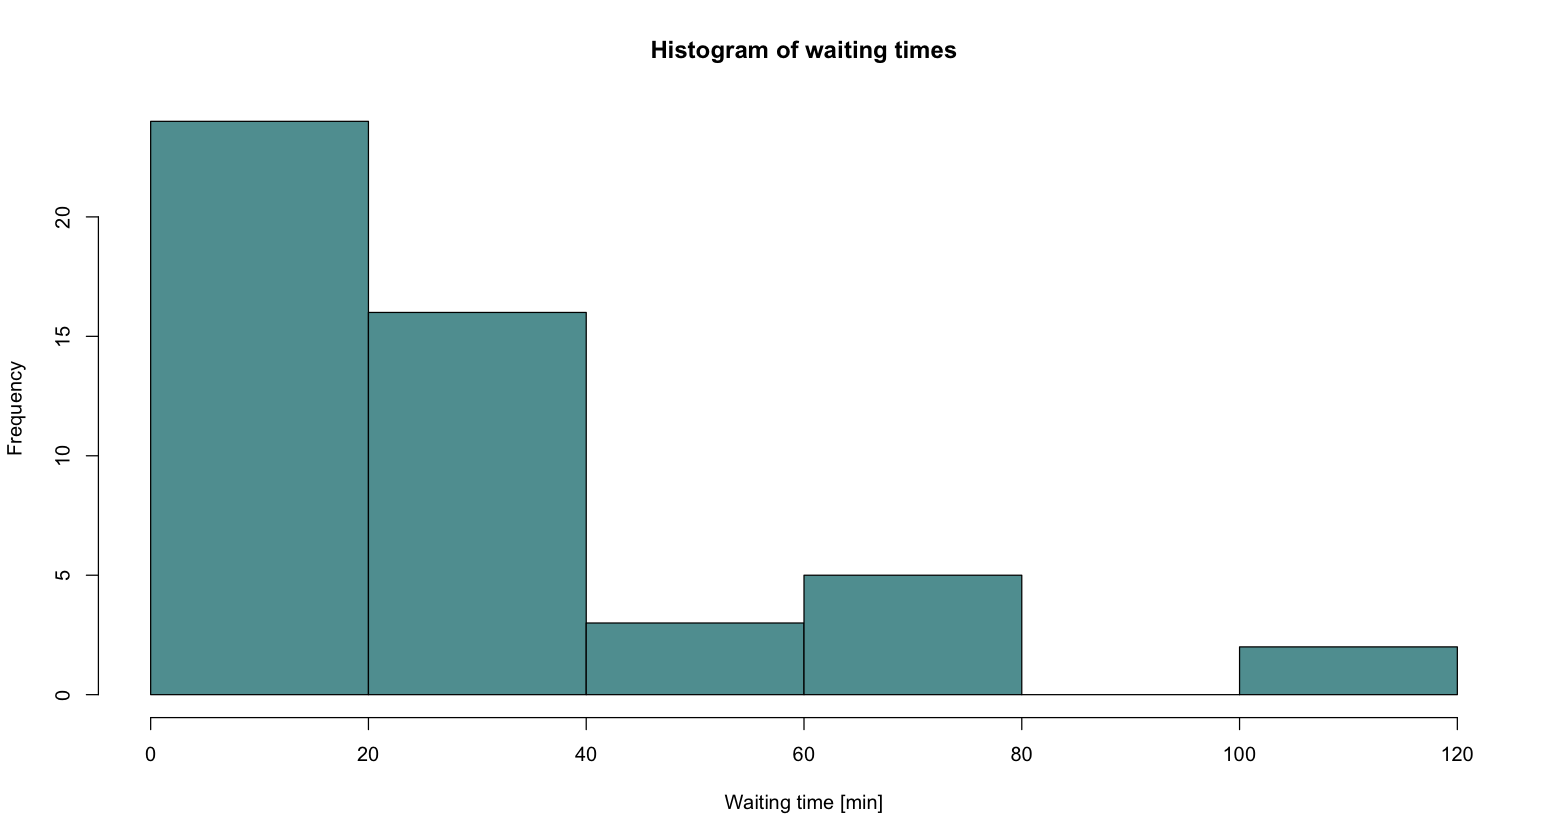

In [61]:
rate = 1/30
data <- rexp(n=50, rate=rate)
hist(data, main='Histogram of waiting times',  col='cadetblue', xlab='Waiting time [min]' )

### B

In [62]:
less10min <- 1-length(data[data > 10]) / length(data)
print(paste("Probability that a patient will wait for less than 10 minutes (theoretical):",round(pexp(10, rate = 1/30)*100,2),"%"))
print(paste("Probability that a patient will wait for less than 10 minutes (R distribution):",round(less10min*100,2),"%"))

[1] "Probability that a patient will wait for less than 10 minutes (theoretical): 28.35 %"
[1] "Probability that a patient will wait for less than 10 minutes (R distribution): 28 %"


### C

In [63]:
ave_time <- sum(data)/length(data)
print(paste("Average waiting time (theoretical):",round(1/rate,2),"minutes"))
print(paste("Average waiting time (R distribution):",round(ave_time,2),"minutes"))

[1] "Average waiting time (theoretical): 30 minutes"
[1] "Average waiting time (R distribution): 27.47 minutes"


### D

In [64]:
#using the cumulative probability
more1hou <- 1-length(data[data < 60]) / length(data)
print(paste("Probability that a patient will wait more than 1 hours (theoretical):",round((1-pexp(60, rate = 1/30))*100,2),"%"))
print(paste("Probability that a patient will wait more than 1 hours (R distribution):",round(more1hou*100,2),"%"))

[1] "Probability that a patient will wait more than 1 hours (theoretical): 13.53 %"
[1] "Probability that a patient will wait more than 1 hours (R distribution): 14 %"


## Exercise 3

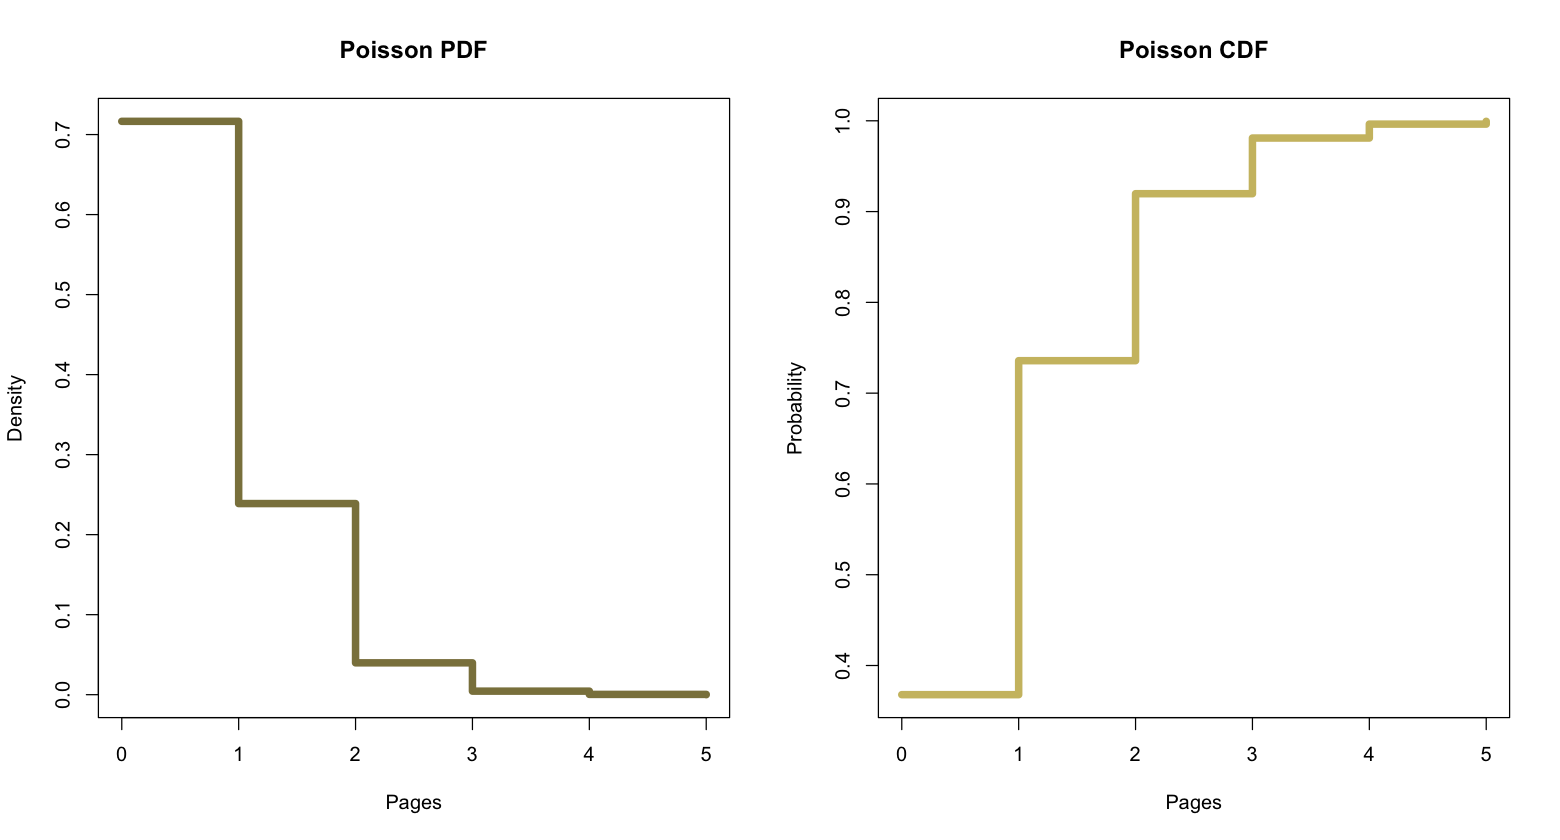

In [65]:
x <- c(0:5)
probs <- dpois(x, lambda=1/3)
y_dpois <- dpois(x,1/3)
y_ppois <- ppois(x,1/3)

par(mfrow=c(1,2))
options(repr.plot.width=13, repr.plot.height=7)

plot(x,y_dpois, type="s",
     xlab = 'Pages',
     ylab = "Density",
     main = "Poisson PDF",
     col = 'lightgoldenrod4',
     lwd = 6
    )
plot(x,
     ppois(x, 1),
     type = "s",
     xlab = 'Pages',
     ylab = "Probability",
     main = "Poisson CDF",
     col = 'lightgoldenrod3',
     lwd = 6
    )

In [66]:
print(paste("Probability of at least one error on a specific page:", round((1 - ppois(0, lambda=1/3))*100,2),"%"))

[1] "Probability of at least one error on a specific page: 28.35 %"


## Exercise 4

The geometric discrete probability distribution applies to this case. The result is exactly 1 minus the cumulative probability that we need 9 draws.

In [67]:
print(paste("Prob of at least one error on a specific page:", round((1-pgeom(9,1/13))*100,2),"%"))

[1] "Prob of at least one error on a specific page: 44.91 %"


## Exercise 5

### A

In order to calculate the determine the normalization constant we do the following, exploiting the normalization itself:
$$1=c\int_1^2(x-1)(2-x)dx\Rightarrow c=\frac{1}{\int_1^2(x-1)(2-x)dx}$$

In [68]:
f1 <- function(x){
    (x-1)*(2-x)
}

c <- 1./integrate(f1, 1, 2)$value

result <- paste('The normalization constant is',c)
print(result)

[1] "The normalization constant is 6"


### B

**PDF**

In [69]:
df1 <- function(x,c){
    return(ifelse(1<x&x<2,c*(x-1)*(2-x),0))
}

**CDF**

In [70]:
pf1 <- function(x,c){
    return(ifelse(1<x&x<2,c*(x^2-2*x-x^3/3+x^2/2+5/6), ifelse(x<=1,0,1)))
}

**Quantile function**

In [71]:
qf1 <- function(q){
    return(ifelse(q>0&q<1,uniroot(function(x){pf1(x,c)-q},lower=1,upper=2)$root,'Invalid value'))
    }
print(qf1(0.5))
print(qf1(11))

[1] 1.5
[1] "Invalid value"


**Random sampling**

In [72]:
rf1 <- function(n) {
    return(qf1(runif(n)))
}

**Plots**

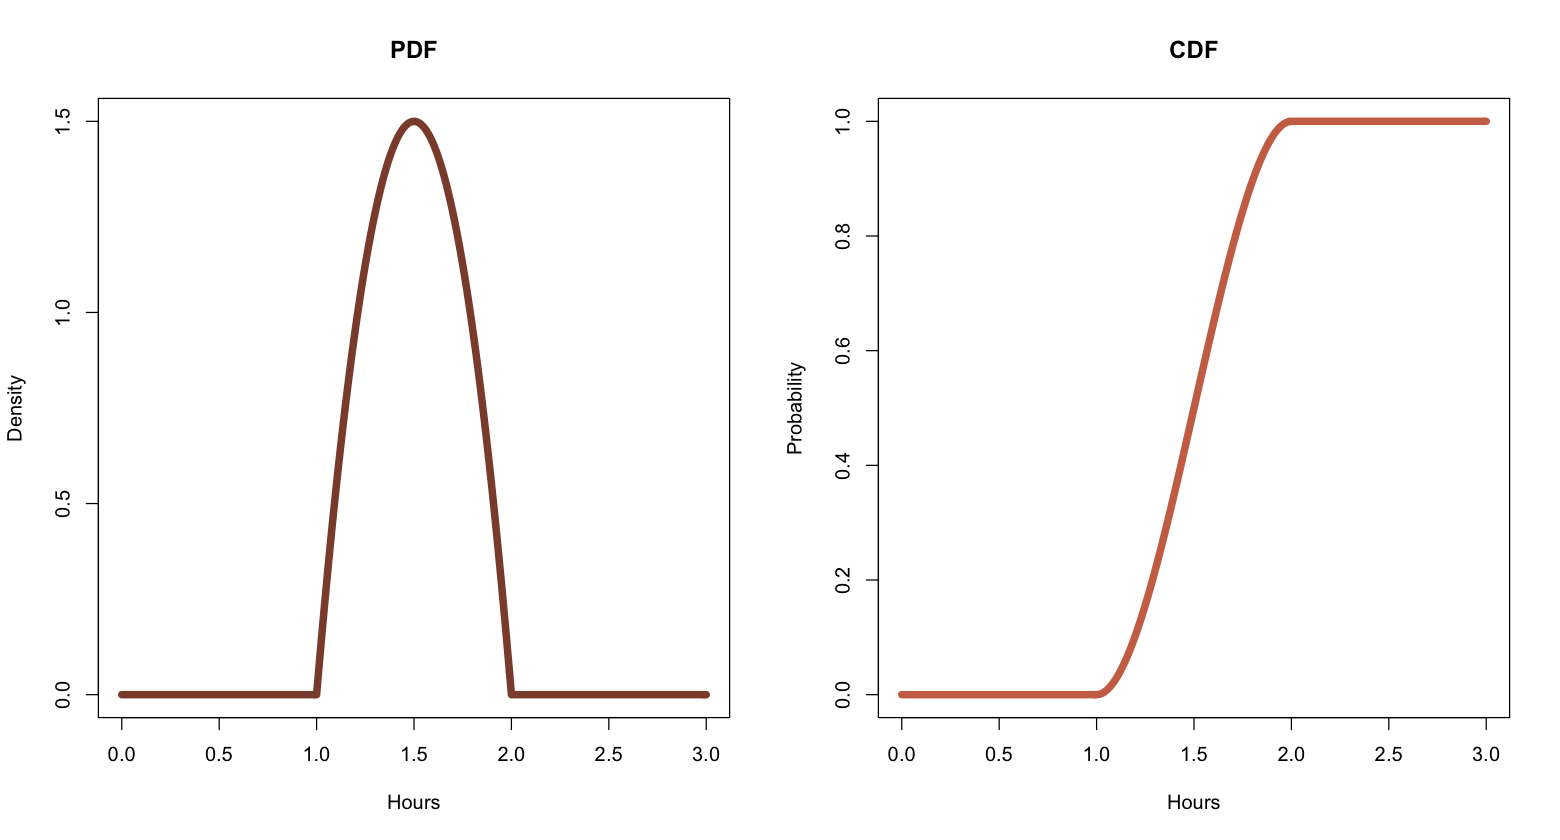

In [73]:
x <- seq(0,3,0.01)
y <- df1(x, c)
y2 <- pf1(x, c)

par(mfrow=c(1,2))
options(repr.plot.width=13, repr.plot.height=7)
plot(x,y,type='l', main='PDF',xlab='Hours',ylab='Density', col = 'salmon4', lwd=6)
plot(x,y2,type='l', main='CDF',xlab='Hours',ylab='Probability', col = 'salmon3', lwd=6)

### C

In [74]:
#one with the cdf, one by integration!
result1 <- paste("The probability that it will take more than 75 minutes is", round((1-pf1(1.25,6))*100,2), "%")
result2 <- paste("The probability that it will take more between 90 and 120 minutes is", round(integrate(df1, lower=1.5,upper=2, c=6)$value*100,2), "%")
print(result1)
print(result2)

[1] "The probability that it will take more than 75 minutes is 84.37 %"
[1] "The probability that it will take more between 90 and 120 minutes is 50 %"


## Exercise 6

### A

In [75]:
f2 <- function(x){
    2/x^2
}

**PDF**

In [76]:
df2 <- function(x){
    return(ifelse(x>1&x<2,2/x^2,0.))
}

**CDF**

In [77]:
pf2 <- function(x) {
    return(ifelse(x>1&x<2,2-2/x,ifelse(x<=1,0,1)))
}

**Quantile function**

In [78]:
qf2 <- function(q) {
    return(ifelse(q>0&q<1,2/(2-q),"Invalid value"))
}
print(qf2(0.5))
print(qf2(11))

[1] 1.333333
[1] "Invalid value"


**Random sampling**

In [79]:
rf2 <- function(n) {
    return(qf2(runif(n)))
}

**Plots**

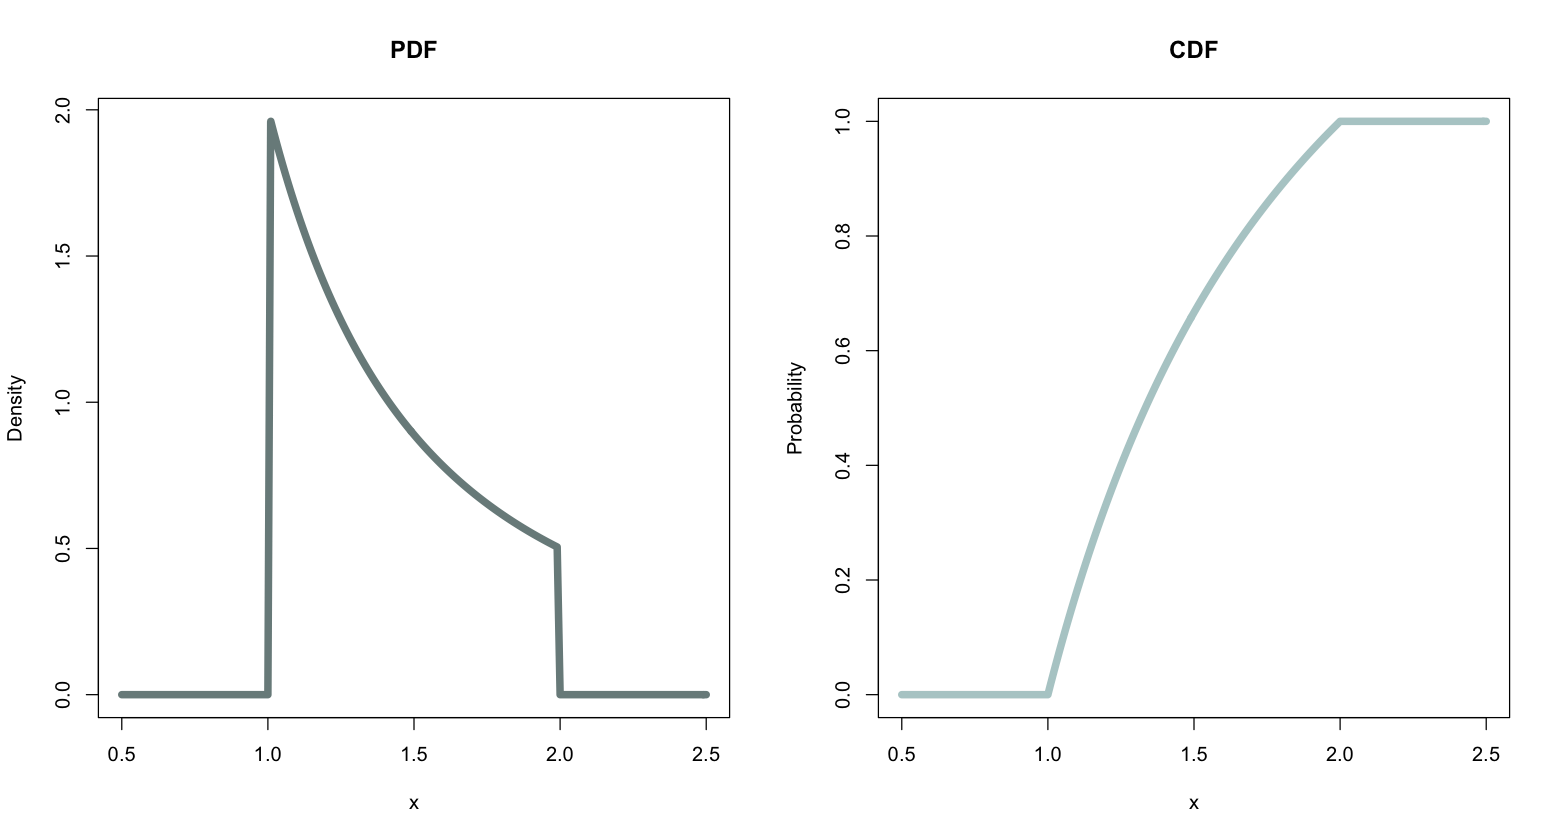

In [80]:
x <- seq(0.5,2.5,0.01)
y <- df2(x)
y2 <- pf2(x)

par(mfrow=c(1,2))
options(repr.plot.width=13, repr.plot.height=7)
plot(x,y,type='l',xlab='x',ylab='Density', main='PDF', col = 'lightcyan4', lwd=6)
plot(x,y2,type='l',xlab='x',ylab='Probability', main='CDF', col = 'lightcyan3', lwd=6)

### B

In [81]:
print(paste("The probability that tires will last less than 15000 km is ", round(pf2(1.5)*100,2), "%"))

[1] "The probability that tires will last less than 15000 km is  66.67 %"


### C

In [82]:
n=3000
data <- tibble(data.frame(samples=rf2(n)))
mean <- mean(data$samples)
var <- mean(data$samples^2) - mean^2
print(paste('The tires last in mean',round(mean,2)*10000,"km"))
print(paste('The variance is',round(var,3)*10000,"km"))

[1] "The tires last in mean 13900 km"
[1] "The variance is 790 km"
